In [1]:
import sys
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

INFO:load_data:✅ CSV loaded: C:\Users\mashel\Desktop\econ_churn\data\raw\products.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    50 non-null     object
 1   category      50 non-null     object
 2   subcategory   50 non-null     object
 3   product_name  50 non-null     object
 4   brand         50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


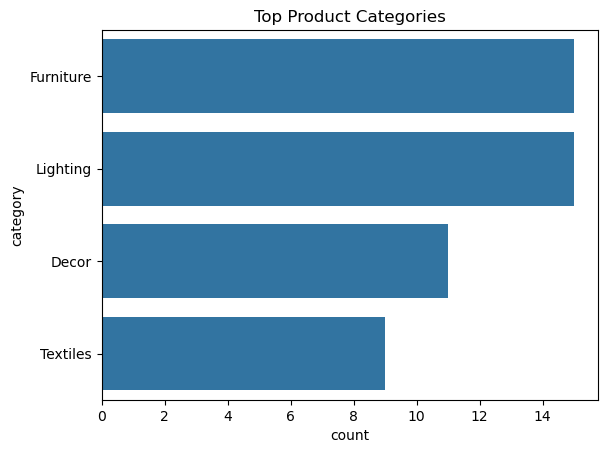

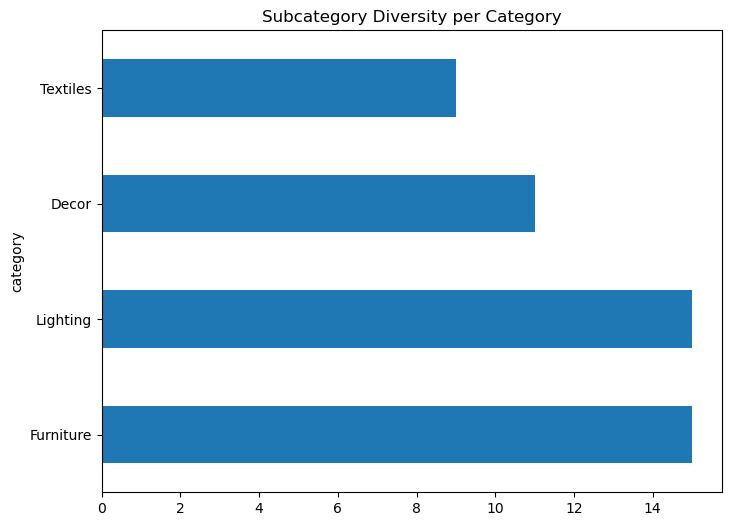

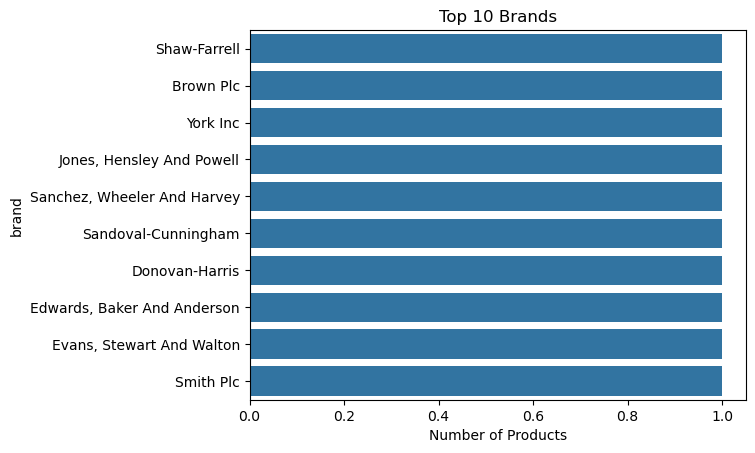

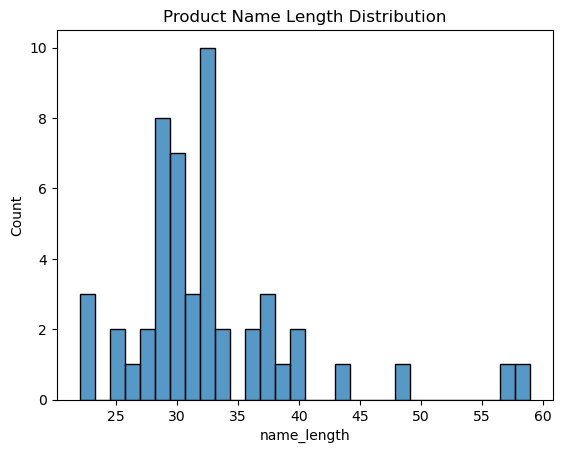

INFO:load_data:💾 Saved CSV to: C:\Users\mashel\Desktop\econ_churn\data\processed\products_clean.csv


In [2]:
# Add utility path
sys.path.append(str((Path().resolve().parent / "src" / "utils").resolve()))
from load_data import load_csv, save_csv

# -------------------------------
# 📥 Load Raw Data
# -------------------------------
df = load_csv("products.csv")
df.head()

# -------------------------------
# 🔍 Initial Exploration
# -------------------------------
df.info()
df.describe(include='all')
df.nunique()

# Check for nulls
df.isna().sum()

# -------------------------------
# 🧹 Data Cleaning
# -------------------------------

# Strip spaces and standardize case
df['category'] = df['category'].str.strip().str.title()
df['subcategory'] = df['subcategory'].str.strip().str.title()
df['brand'] = df['brand'].str.strip().str.title()
df['product_name'] = df['product_name'].str.strip()

# Drop missing essential fields
df = df.dropna(subset=['product_id', 'product_name'])

# Optional: Handle unknown brands
df['brand'] = df['brand'].fillna('Unknown')

# -------------------------------
# 🧠 Feature Engineering
# -------------------------------

# Length of product name (proxy for description complexity)
df['name_length'] = df['product_name'].str.len()

# Brand popularity (joinable later with order count or reviews)
# (Keep for merge context, not here)

# -------------------------------
# 📊 Exploratory Data Analysis
# -------------------------------

# Top categories
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title("Top Product Categories")
plt.show()

# Subcategories per category
subcategory_counts = df.groupby('category')['subcategory'].nunique().sort_values(ascending=False)
subcategory_counts.plot(kind='barh', figsize=(8, 6), title='Subcategory Diversity per Category')
plt.show()

# Brand distribution
top_brands = df['brand'].value_counts().nlargest(10)
sns.barplot(y=top_brands.index, x=top_brands.values)
plt.title("Top 10 Brands")
plt.xlabel("Number of Products")
plt.show()

# Name length distribution
sns.histplot(df['name_length'], bins=30)
plt.title("Product Name Length Distribution")
plt.show()

# -------------------------------
# 💾 Save Cleaned File
# -------------------------------
save_csv(df, "products_clean.csv")
